Import Necessary Libraries

In [1]:
# Loading in packages
import boto3
import os
import glob
import shutil
import pyarrow.csv as csv
import pyarrow.parquet as pq
import pyarrow as pa
from io import BytesIO

Import subsetted data from S3 to graph

In [3]:
import boto3
import pyarrow.parquet as pq
from io import BytesIO

# Create Boto3 S3 client
s3_client = boto3.client('s3')

bucket_name = 'noturs'  
parquet_folder = 'rplace-parquet/'  
file_name = 'result.parquet'  

# read Parquet files from S3 bucket
def read_parquet_from_s3(bucket, folder, file_name):
    # Get Parquet file from S3
    response = s3_client.get_object(Bucket=bucket, Key=folder + file_name)
    # Read Parquet file using pyarrow
    parquet_file = pq.read_table(BytesIO(response['Body'].read()))
    return parquet_file

# Read Parquet file into a PyArrow Table
parquet_table = read_parquet_from_s3(bucket_name, parquet_folder, file_name)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Convert PyArrow Table to Pandas DataFrame

In [4]:
result_df = parquet_table.to_pandas()
result_df['coordinate'].nunique()

1175531

Wrangle data before plotting:

-Sort rows by ascending timestamp
-Drop duplicates by the column coordinate
-Split coordinate into x & y coordinates
-Drop the original coordinate column, timestamp, and user column

In [11]:
df_sorted = result_df.sort_values(by='timestamp', ascending=True)
df_unique = df_sorted.drop_duplicates(subset='coordinate')
result_df = df_unique
result_df[['x', 'y']] = result_df['coordinate'].str.extract(r'(?P<x>-?\d+)\s*,\s*(?P<y>-?\d+)')
result_df.drop(['coordinate', 'timestamp', 'user'], axis=1, inplace=True)

In [25]:
result_df

,pixel_color,x,y
10724757,#FFFFFF,-199,-235
0,#FF4500,0,-298
10724758,#FFFFFF,-42,-218
1,#FF4500,182,164
10724759,#FFFFFF,-113,-1
...,...,...,...
10724735,#94B3FF,1195,540
10724736,#94B3FF,1363,56
10724744,#94B3FF,-679,886
10724749,#94B3FF,1199,529


In [23]:
result_df.dtypes

pixel_color    object
x              object
y              object
dtype: object

Convert data to numeric for plotting

In [26]:
result_df['x'] = pd.to_numeric(result_df['x'])
result_df['y'] = pd.to_numeric(result_df['y'])

/tmp/ipykernel_34624/1389863514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['x'] = pd.to_numeric(result_df['x'])
/tmp/ipykernel_34624/1389863514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['y'] = pd.to_numeric(result_df['y'])


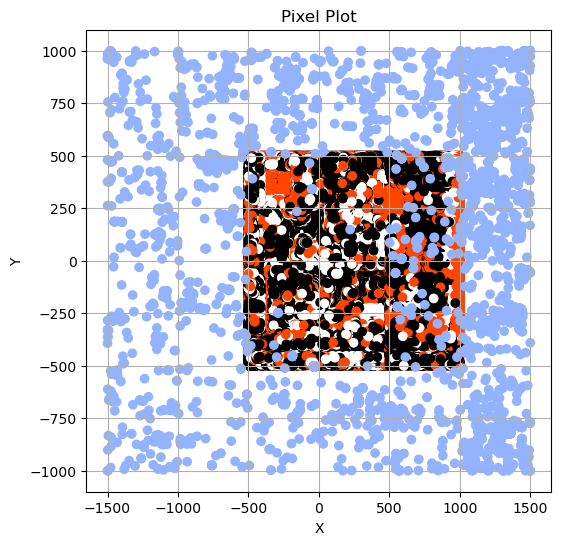

In [27]:
import matplotlib.pyplot as plt



# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(result_df['x'], result_df['y'], color=result_df['pixel_color'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pixel Plot')
plt.grid(True)
plt.show()

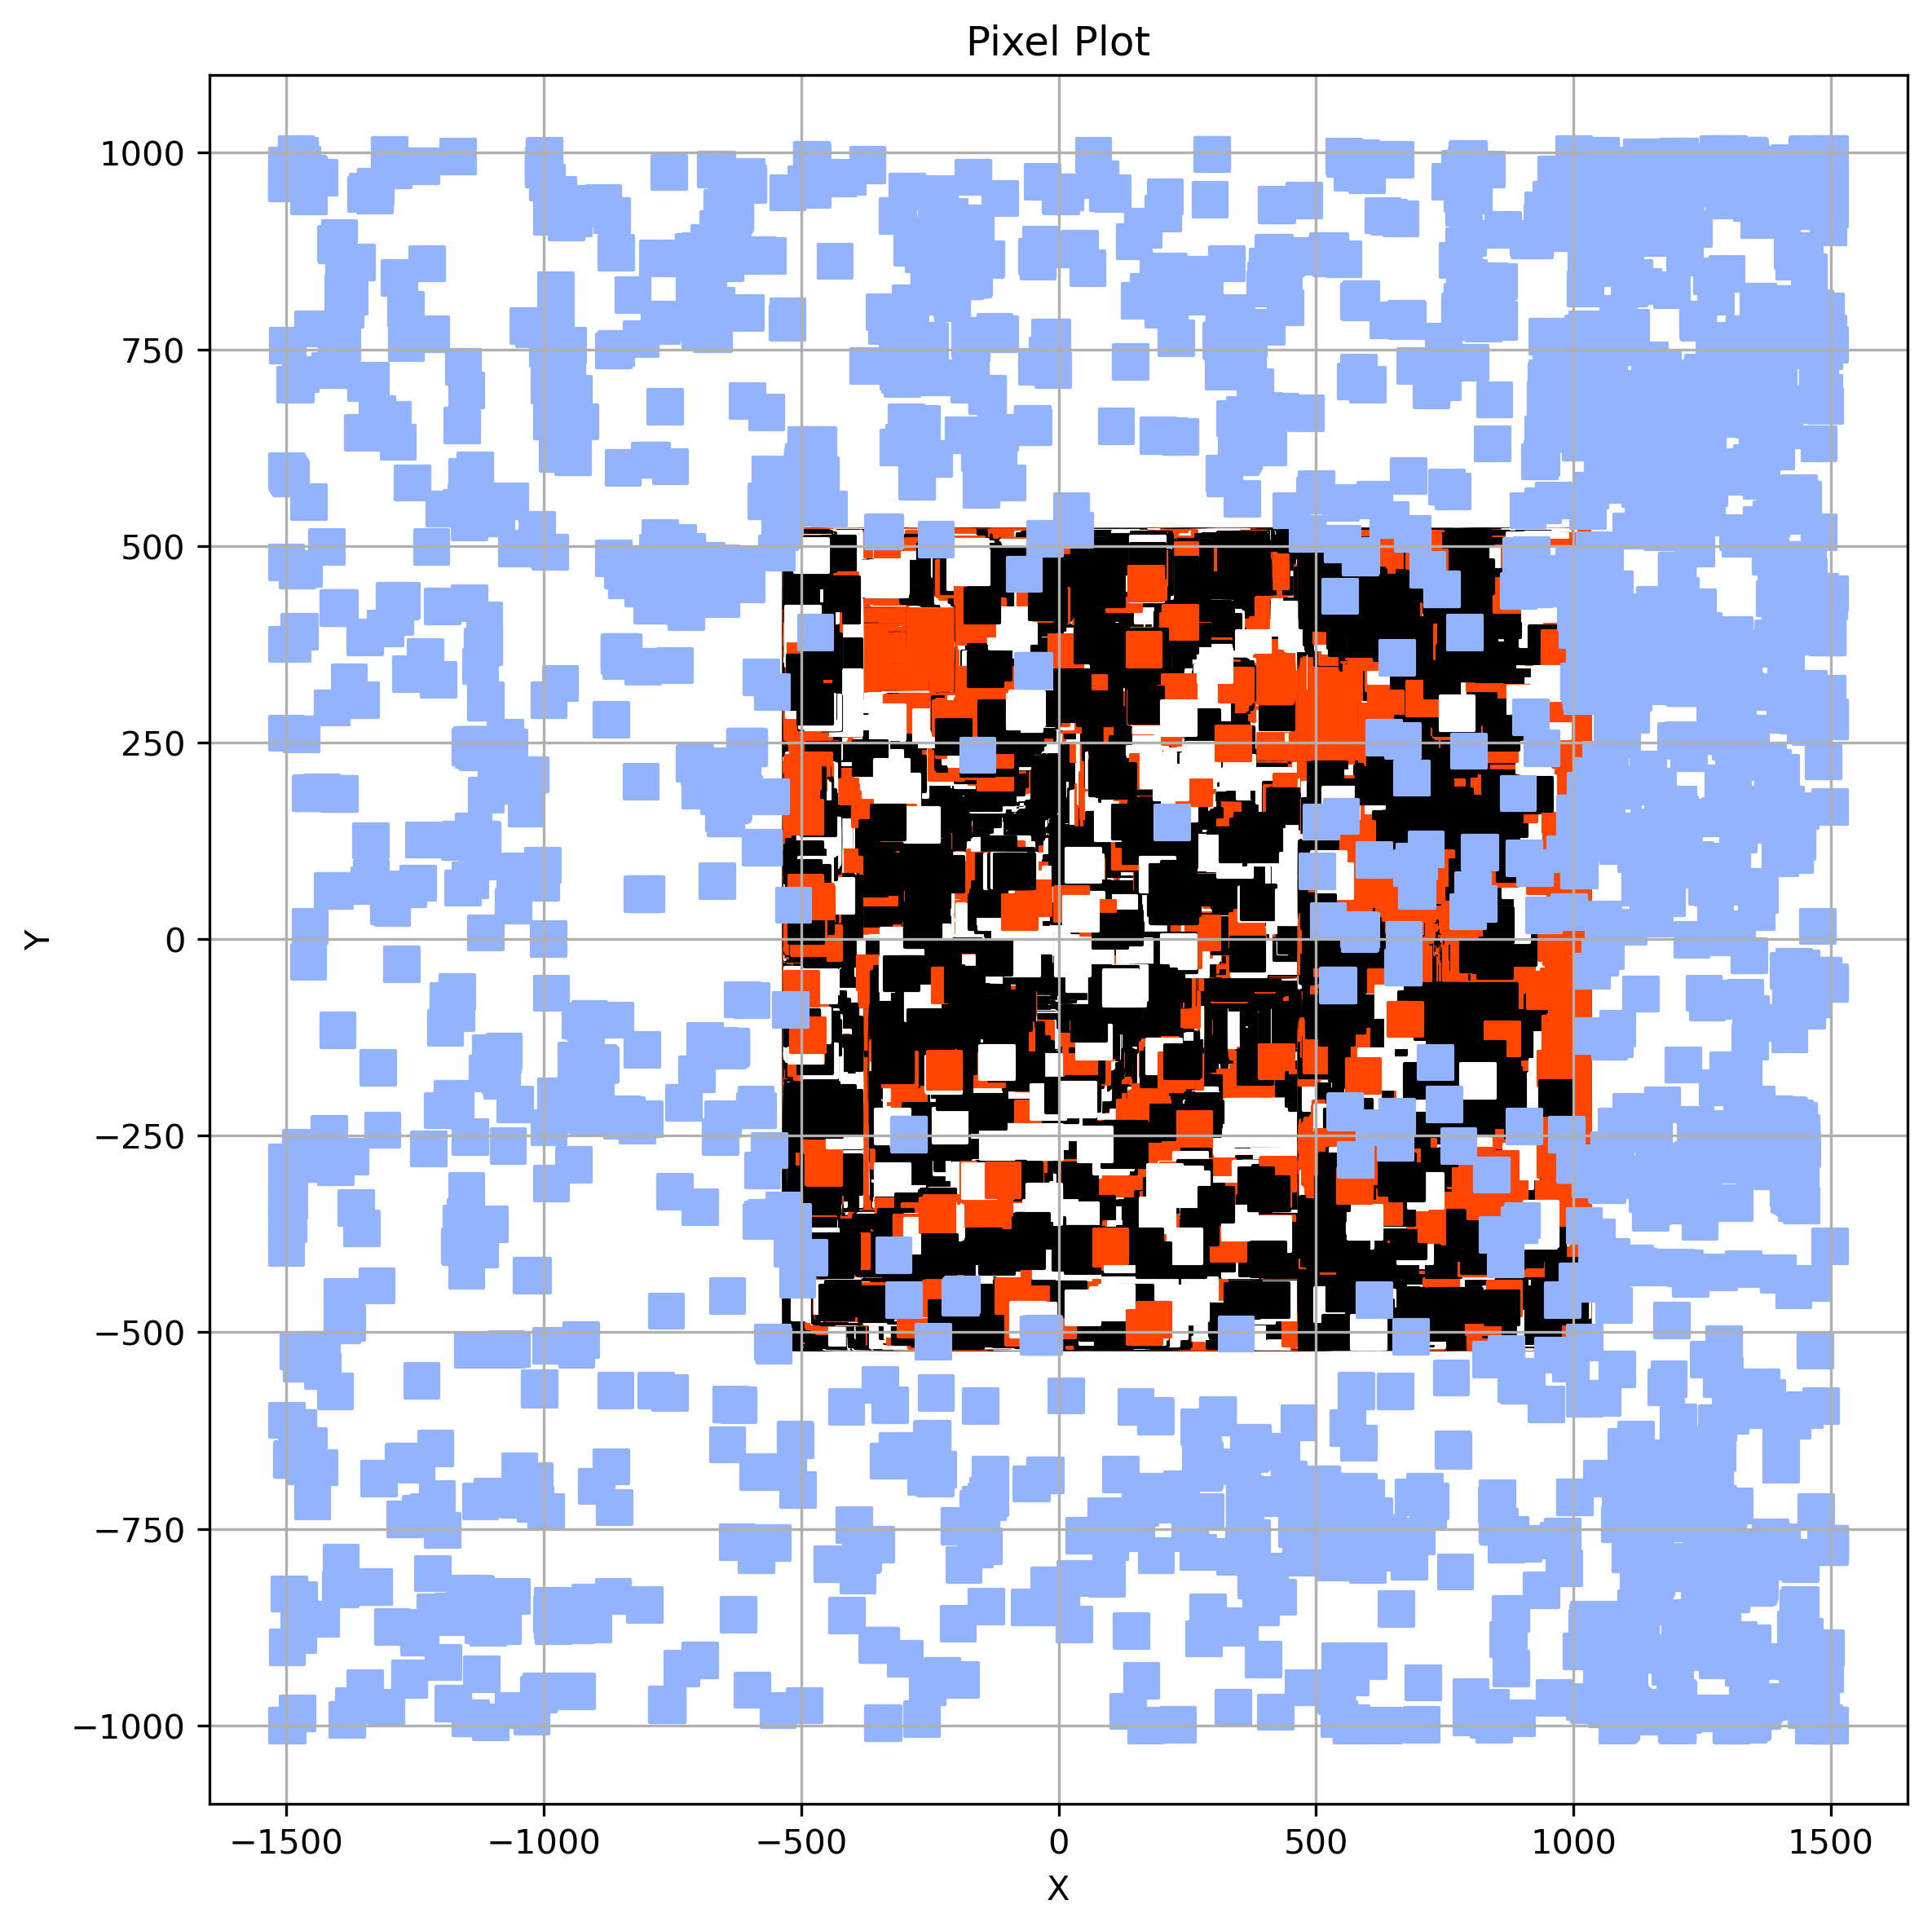

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 8), dpi=300)


plt.scatter(result_df['x'], result_df['y'], color=result_df['pixel_color'], marker='s', s=100)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pixel Plot')
plt.grid(True)
plt.tight_layout()  
plt.show()